In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats
from scipy import stats

from statsmodels.formula.api import ols
from scipy.stats import f

In [62]:
data=pd.read_csv("uploads/Student_Performance.csv")

# Preprocessing

In [63]:
data.head()

Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0

In [64]:
data.shape

(10000, 6)

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [66]:
df=pd.DataFrame(data)
df

Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0                 7               99                        Yes            9   
1                 4               82                         No            4   
2                 8               51                        Yes            7   
3                 5               52                        Yes            5   
4                 7               75                         No            8   
...             ...              ...                        ...          ...   
9995              1               49                        Yes            4   
9996              7               64                        Yes            8   
9997              6               83                        Yes            8   
9998              9               97                        Yes            7   
9999              7               74                         No            8   

      Sample Question Papers Practiced  Performance Index  
0                                    1               91.0  
1                                    2               65.0  
2                                    2               45.0  
3                                    2               36.0  
4                                    5               66.0  
...                                ...                ...  
9995                                 2               23.0  
9996                                 5               58.0  
9997                                 5               74.0  
9998                                 0               95.0  
9999                                 1               64.0  

[10000 rows x 6 columns]

In [67]:
df.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [68]:
df.duplicated().sum()

np.int64(127)

In [69]:
df=df.drop_duplicates()

In [70]:
df.duplicated().any()

np.False_

In [71]:
df.describe()

Hours Studied  Previous Scores  Sleep Hours  \
count    9873.000000      9873.000000  9873.000000   
mean        4.992100        69.441102     6.531652   
std         2.589081        17.325601     1.697683   
min         1.000000        40.000000     4.000000   
25%         3.000000        54.000000     5.000000   
50%         5.000000        69.000000     7.000000   
75%         7.000000        85.000000     8.000000   
max         9.000000        99.000000     9.000000   

       Sample Question Papers Practiced  Performance Index  
count                       9873.000000        9873.000000  
mean                           4.583004          55.216651  
std                            2.867202          19.208570  
min                            0.000000          10.000000  
25%                            2.000000          40.000000  
50%                            5.000000          55.000000  
75%                            7.000000          70.000000  
max                            9.000000         100.000000

In [72]:
df['Extracurricular_Encoded'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

C:\Users\tokyo\AppData\Local\Temp\ipykernel_28232\3740792514.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



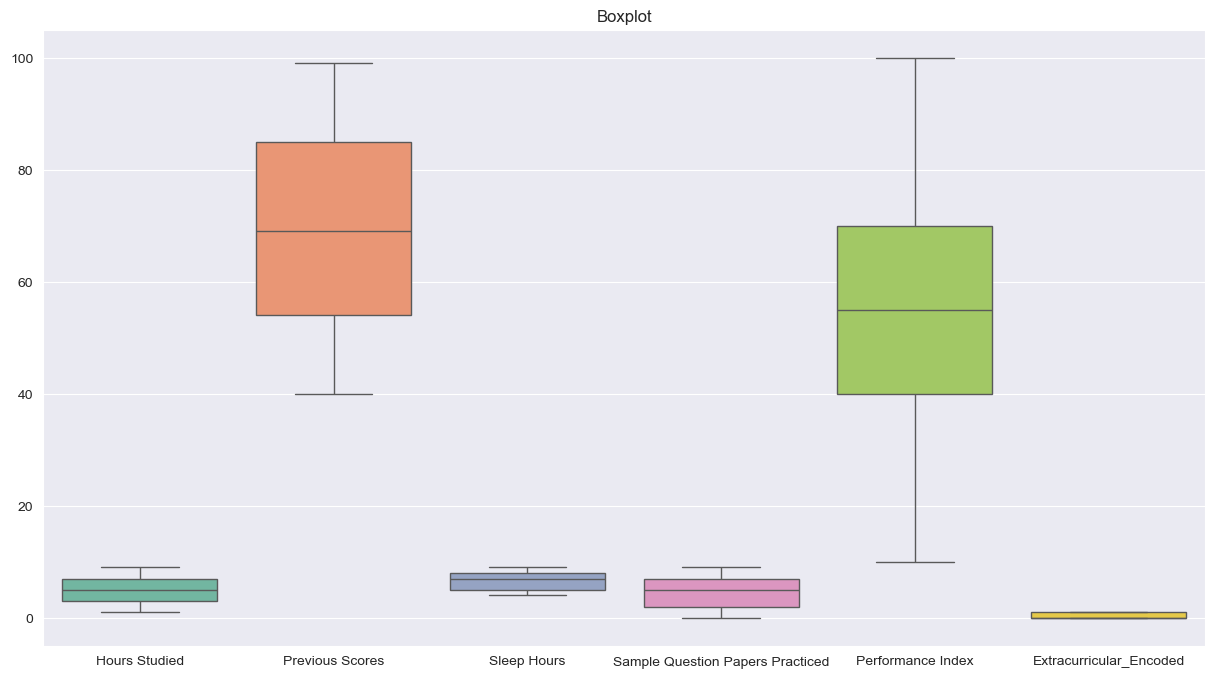

In [73]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, palette="Set2")
plt.title("Boxplot")
plt.show()
######tab1

# Visualizations

In [74]:
fig1 = px.box(df, x='Extracurricular Activities', y='Performance Index', 
              title='Score Distribution by Extracurricular Activities',
              color='Extracurricular Activities',
              labels={'Performance Index': 'Performance Index', 
                      'Extracurricular Activities': 'Extracurricular Activities'})

fig1.update_layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    title_font=dict(color='white')
)
fig1.show()

In [75]:
fig2 = px.scatter(df, x='Hours Studied', y='Performance Index',
                  color='Extracurricular Activities',
                  title='Hours Studied vs Performance by Extracurricular Activities',
                  hover_data=['Previous Scores', 'Sleep Hours'],
                  labels={'Hours Studied': 'Hours Studied', 
                          'Performance Index': 'Performance Index',
                          'Extracurricular Activities': 'Extracurricular Activities'})

fig2.update_layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    title_font=dict(color='white')
)
fig2.show()
#######tab2

In [76]:
fig3 = px.bar(df, x='Sleep Hours', y='Performance Index',
              color='Extracurricular Activities', barmode='group',
              title='Sum Performance by Sleep Hours and Extracurricular Activities',
              labels={'Performance Index': 'Performance Index',
                      'Sleep Hours': 'Sleep Hours',
                      'Extracurricular Activities': 'Extracurricular Activities'})

fig3.update_layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    title_font=dict(color='white')
)
fig3.show()

In [77]:
fig4 = px.violin(df, x='Sample Question Papers Practiced', y='Performance Index',
                 color='Extracurricular Activities', box=True,
                 title='Effect of Practicing Sample Questions on Performance',
                 labels={'Performance Index': 'Performance Index',
                         'Sample Question Papers Practiced': 'Sample Papers Practiced',
                         'Extracurricular Activities': 'Extracurricular Activities'})

fig4.update_layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    title_font=dict(color='white')
)
fig4.show()


In [78]:
df['Sleep Category'] = pd.cut(df['Sleep Hours'], 
                                bins=[0, 5, 7, 9, 24], 
                                labels=['<5 hours', '5-7 hours', '7-9 hours', '>9 hours'])

fig6 = px.sunburst(df, path=['Sleep Category', 'Extracurricular Activities'], 
                    values='Performance Index',
                    title='Performance Distribution by Sleep Hours and Extracurricular Activities',
                    labels={'Sleep Category': 'Sleep Hours',
                            'Extracurricular Activities': 'Extracurricular Activities',
                            'Performance Index': 'Performance Index'})

fig6.update_layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    title_font=dict(color='white')
)
fig6.show()

C:\Users\tokyo\AppData\Local\Temp\ipykernel_28232\3801465221.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\tokyo\miniconda3\Lib\site-packages\plotly\express\_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\tokyo\miniconda3\Lib\site-packages\plotly\express\_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



##  Calculate the Correlation Matrix

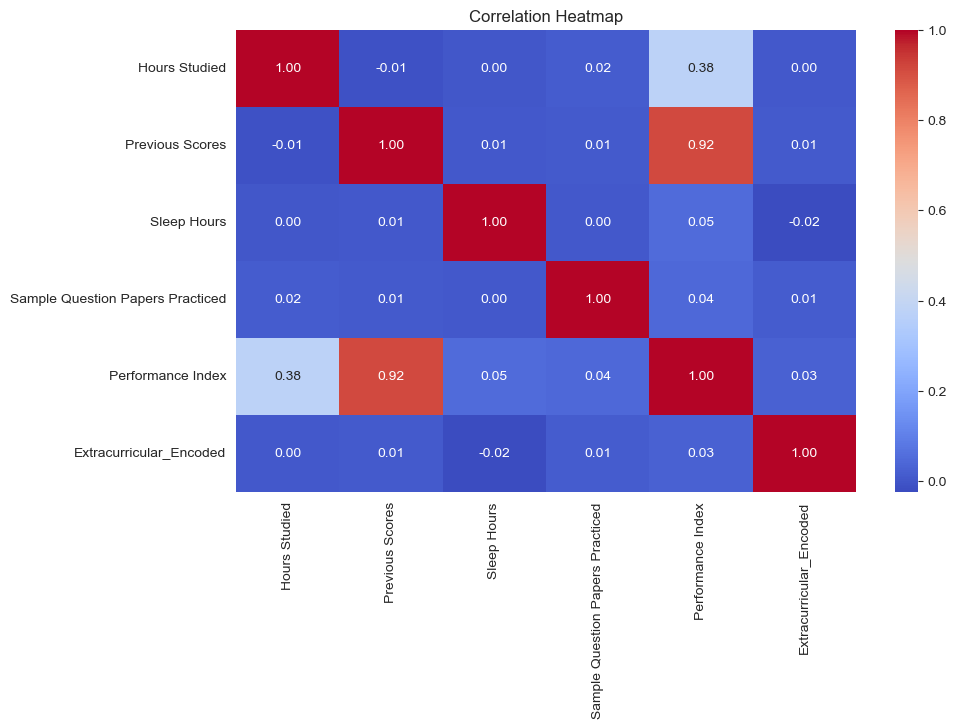

In [79]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Regression Analysis

In [80]:
class MultipleLinearRegression:
            def __init__(self):
                self.F_stat = None
                self.SSR = None
                self.SST = None
                self.SSE = None
                self.y_bar = None
                self.n = None
                self.df_regression = None
                self.df_error = None
                self.B = None
                self.MSE = None
                self.r_squared = None
                self.error = None
                self.X = None
                self.y = None
                self.F_c = None
                self.R_2_adj = None

            def Fitting_Function(self, X, y):
                self.n = len(X)
                self.y_bar = np.mean(y)

                if isinstance(X, pd.DataFrame):
                    X = X.copy()
                    if 'B0' not in X.columns:
                        X.insert(0, 'B0', 1)
                else:
                    #Stack 1-D arrays as columns into a 2-D array.
                    X = np.column_stack([np.ones(self.n), X])

                X = np.array(X)
                y = np.array(y)

                XT_X = X.T @ X # @ -> Dot Product
                XT_y = X.T @ y
                self.B = np.linalg.inv(XT_X) @ XT_y

                self.SSE = y.T @ y - self.B.T @ XT_y
                self.SST = y.T @ y - self.n * (self.y_bar ** 2)
                self.SSR = self.SST - self.SSE
                self.r_squared = self.SSR / self.SST

                self.df_error = self.n - len(self.B)
                self.df_regression = len(self.B) - 1
                self.error = y - X @ self.B
                self.MSE = self.SSE / self.df_error
                self.X = X
                self.R_2_adj = 1 - ((self.n - 1) / (self.n - len(self.B)) * (self.SSE / self.SST))

            def Prediction_Model(self, X):
                if self.B is None:
                    raise ValueError("Model not fitted yet.")

                if isinstance(X, pd.DataFrame):
                    X = X.copy()
                    if 'B0' not in X.columns:
                        X.insert(0, 'B0', 1)
                else:
                    X = np.column_stack([np.ones(len(X)), X])

                return X @ self.B #returns Y-hat

            def Plot_3D(self, X, y, feature_names=None):
                """Plot 3D regression for any two features while holding others constant"""
                if len(self.B) < 3:
                    raise ValueError("Need at least two predictors for 3D plot")

                X = np.array(X)
                y = np.array(y)

                if feature_names is None:
                    feature_names = [f'Feature {i}' for i in range(X.shape[1])]

                # Create subplots for all feature pairs
                from itertools import combinations
                from plotly.subplots import make_subplots
                import plotly.graph_objects as go

                feature_pairs = list(combinations(range(X.shape[1]), 2))
                rows = int(np.ceil(len(feature_pairs)/2))

                fig = make_subplots(
                    rows=rows, cols=2,
                    specs=[[{'type': 'surface'}, {'type': 'surface'}] for _ in range(rows)],
                    subplot_titles=[f"{feature_names[i]} vs {feature_names[j]}" for i,j in feature_pairs],
                    horizontal_spacing=0.1,
                    vertical_spacing=0.1
                )

                for idx, (i, j) in enumerate(feature_pairs):
                    row = (idx // 2) + 1
                    col = (idx % 2) + 1

                    # Create grid for surface plot
                    x1_range = np.linspace(X[:, i].min(), X[:, i].max(), 20)
                    x2_range = np.linspace(X[:, j].min(), X[:, j].max(), 20)
                    x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)

                    # Create prediction matrix (hold other features at their mean)
                    X_grid = np.column_stack([np.ones(x1_grid.size)])
                    for k in range(X.shape[1]):
                        if k == i:
                            X_grid = np.column_stack([X_grid, x1_grid.ravel()])
                        elif k == j:
                            X_grid = np.column_stack([X_grid, x2_grid.ravel()])
                        else:
                            X_grid = np.column_stack([X_grid, np.full(x1_grid.size, X[:, k].mean())])

                    y_grid = (X_grid @ self.B).reshape(x1_grid.shape)

                    # Add scatter plot
                    fig.add_trace(
                        go.Scatter3d(
                            x=X[:, i], y=X[:, j], z=y,
                            mode='markers',
                            marker=dict(size=4, color='purple', opacity=0.7),
                            showlegend=False
                        ),
                        row=row, col=col
                    )

                    # Add surface plot
                    fig.add_trace(
                        go.Surface(
                            x=x1_grid, y=x2_grid, z=y_grid,
                            colorscale='ice',
                            opacity=0.6,
                            showscale=False
                        ),
                        row=row, col=col
                    )

                    # Update subplot scene
                    fig.update_scenes(
                        xaxis_title=feature_names[i],
                        yaxis_title=feature_names[j],
                        zaxis_title='Performance Index',
                        camera=dict(eye=dict(x=1.5, y=1.5, z=0.5)),
                        row=row, col=col
                    )

                fig.update_layout(
                    title_text="Multiple Linear Regression - Feature Relationships",
                    height=400 * rows,
                    margin=dict(l=0, r=0, b=0, t=40),
                    paper_bgcolor='rgba(0,0,0,0)',
                    plot_bgcolor='rgba(0,0,0,0)',
                    title_font=dict(color='white')
                )
                fig.show()


            def Anova_Table(self):
                if self.B is None:
                    raise ValueError("The model has not been fitted yet.")

                df_total = self.n - 1

                MSR = self.SSR / self.df_regression
                MSE = self.SSE / self.df_error

                self.F_stat = MSR / MSE

                anova_data = {
                    'Source': ['Regression', 'Error', 'Total'],
                    'Sum of Squares': [self.SSR, self.SSE, self.SST],
                    'Degrees of Freedom': [self.df_regression, self.df_error, df_total],
                    'Mean Square': [MSR, MSE, ""],
                    'F-Statistic': [self.F_stat, "", ""]
                }

                anova_table = pd.DataFrame(anova_data)
                return anova_table


            def Interval_Estimation(self, alpha=0.05, Features_name=None, sigma=None):
                if self.B is None or self.MSE is None:
                    raise ValueError("Fit the model before running interval estimation.")

                XTX_inv = np.linalg.inv(self.X.T @ self.X)

                if sigma is None:
                    std_errors = np.sqrt(np.diag(self.MSE * XTX_inv))
                    critical_value = stats.t.ppf(1 - alpha / 2, df=self.df_error)
                else:
                    std_errors = np.sqrt(np.diag((sigma ** 2) * XTX_inv))
                    critical_value = stats.norm.ppf(1 - alpha / 2)

                lower_bounds = self.B.flatten() - critical_value * std_errors
                upper_bounds = self.B.flatten() + critical_value * std_errors

                if Features_name is None:
                    terms = ['Intercept β₀'] + [f'x{i}' for i in range(1, len(self.B.flatten()))]
                else:
                    terms = ['Intercept β₀'] + Features_name

                return pd.DataFrame({
                    'Term': terms,
                    'Coefficient': self.B.flatten(),
                    'Lower Bound': lower_bounds,
                    'Upper Bound': upper_bounds,
                    'Confidence Level': [f'{(1 - alpha) * 100:.1f}%' for _ in self.B.flatten()]
                })


In [81]:
def qname(name):
    return f'Q("{name}")'

def partial_f_test(df, response, predictors):
    response_q = qname(response)
    predictors_q = [qname(p) for p in predictors]
    full_formula = f"{response_q} ~ {' + '.join(predictors_q)}"
    full_model = ols(full_formula, data=df).fit()
    RSS_full = sum((full_model.fittedvalues - df[response]) ** 2)
    df_full = full_model.df_resid

    results = []

    for predictor in predictors:
        reduced_predictors = [p for p in predictors if p != predictor]
        reduced_q = [qname(p) for p in reduced_predictors]
        reduced_formula = f"{response_q} ~ {' + '.join(reduced_q)}"
        reduced_model = ols(reduced_formula, data=df).fit()
        RSS_reduced = sum((reduced_model.fittedvalues - df[response]) ** 2)
        df_reduced = reduced_model.df_resid

        num = (RSS_reduced - RSS_full) / (df_reduced - df_full)
        den = RSS_full / df_full
        F_stat = num / den

        alpha = 0.05
        dfn = df_reduced - df_full
        dfd = int(df_full)
        F_critical = f.ppf(1 - alpha, dfn, dfd)
        p_value = 1 - f.cdf(F_stat, dfn, dfd)

        decision = "Significant (keep)" if F_stat > F_critical else "Not Significant (can drop)"

        results.append({
            'Predictor': predictor,
            'F_stat': F_stat,
            'F_critical': F_critical,
            'p_value': p_value,
            'Decision': decision,
        })

    return pd.DataFrame(results)

In [82]:
X = df[['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced','Extracurricular_Encoded']]
y = df['Performance Index']
features = ['Hours Studied β₁', 'Previous Scores β₂', 'Sleep Hours β₃', 'Sample Papers β₄','Extracurricular Activities β₅']
MLR = MultipleLinearRegression()
MLR.Fitting_Function(X, y)

In [83]:
print(f'Line of best fit is: y = {round(MLR.B[0],2)} + {round(MLR.B[1],2)} X₁ + {round(MLR.B[2],2)} X₂ + {round(MLR.B[3],2)} X₃ + {round(MLR.B[4],2)} X₄ + {round(MLR.B[5],2)} X₅')

Line of best fit is: y = -34.07 + 2.85 X₁ + 1.02 X₂ + 0.48 X₃ + 0.19 X₄ + 0.62 X₅


In [84]:
print("R² : ",MLR.r_squared)
print("R² adjusted : ", MLR.R_2_adj)

R² :  0.9886813814840912
R² adjusted :  0.9886756458914511


In [85]:
MLR.Anova_Table()

Source  Sum of Squares  Degrees of Freedom   Mean Square    F-Statistic
0  Regression    3.601236e+06                   5  720247.18535  172376.499436
1       Error    4.122766e+04                9867      4.178337               
2       Total    3.642464e+06                9872

In [86]:
Predicted = MLR.Prediction_Model(X)

Comparison = pd.DataFrame({
    "Actual" : y,
    "Predicted" : Predicted
})
Comparison.head()

Actual  Predicted
0    91.0  91.847305
1    65.0  63.153299
2    45.0  45.053968
3    36.0  36.553459
4    66.0  67.086264

In [87]:
MLR.hypothesis_test()

{'I1': 'B1 = B2 = ... = Bn = 0 (No relationship) ',
 'I2': 'At Least one Estimator Bi ≠ 0 for i = 1,2,...,n (Relationship exists)',
 'I3': [np.float64(172376.49943572172), np.float64(2.215005215390704)],
 'I4': "Since F_0 > F_c, we reject the null hypothesis.\nTherefore, there's a relationship between x and y."}

In [88]:
MLR.Interval_Estimation(alpha=0.05, Features_name=features)

Term  Coefficient  Lower Bound  Upper Bound  \
0                   Intercept β₀   -34.068915   -34.320093   -33.817737   
1               Hours Studied β₁     2.852729     2.837149     2.868308   
2             Previous Scores β₂     1.018319     1.015991     1.020647   
3                 Sleep Hours β₃     0.480321     0.456559     0.504084   
4               Sample Papers β₄     0.193910     0.179841     0.207979   
5  Extracurricular Activities β₅     0.616693     0.536003     0.697384   

  Confidence Level  
0            95.0%  
1            95.0%  
2            95.0%  
3            95.0%  
4            95.0%  
5            95.0%

In [89]:
MLR.Plot_3D(X,y,features)

In [90]:
predictors = ["Hours Studied", "Previous Scores", "Extracurricular Activities", "Sleep Hours", "Sample Question Papers Practiced"]
x = partial_f_test(data, response="Performance Index", predictors=predictors)
x

Predictor         F_stat  F_critical       p_value  \
0                     Hours Studied  131300.003115    3.842389  1.110223e-16   
1                   Previous Scores  750735.576194    3.842389  1.110223e-16   
2        Extracurricular Activities     225.876318    3.842389  1.110223e-16   
3                       Sleep Hours    1597.799588    3.842389  1.110223e-16   
4  Sample Question Papers Practiced     742.920869    3.842389  1.110223e-16   

             Decision  
0  Significant (keep)  
1  Significant (keep)  
2  Significant (keep)  
3  Significant (keep)  
4  Significant (keep)